In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

<h3> Loading Data </h3>

In [83]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [84]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h3> Finding out column names and their data types </h3>

In [85]:
types= []
for x in range(0,22,1):
    types.append(df.iloc[:,x].dtype)
    print('column name: {}       dtype: {}'.format(df.iloc[:,x].name, types[x]))

column name: Unnamed: 0       dtype: int64
column name: id       dtype: int64
column name: date       dtype: object
column name: price       dtype: float64
column name: bedrooms       dtype: float64
column name: bathrooms       dtype: float64
column name: sqft_living       dtype: int64
column name: sqft_lot       dtype: int64
column name: floors       dtype: float64
column name: waterfront       dtype: int64
column name: view       dtype: int64
column name: condition       dtype: int64
column name: grade       dtype: int64
column name: sqft_above       dtype: int64
column name: sqft_basement       dtype: int64
column name: yr_built       dtype: int64
column name: yr_renovated       dtype: int64
column name: zipcode       dtype: int64
column name: lat       dtype: float64
column name: long       dtype: float64
column name: sqft_living15       dtype: int64
column name: sqft_lot15       dtype: int64


<h3> Preprocessing </h3>

In [86]:
df = df.drop('id' ,axis =1)
df = df.drop('Unnamed: 0',axis = 1)

In [87]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [90]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean2=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean2, inplace=True)

In [91]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


<h3> Data Exploration </h3>

In [92]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


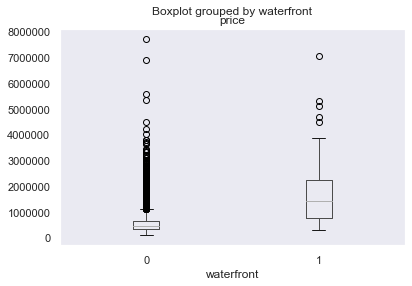

In [93]:
df.boxplot(by ='waterfront', column =['price'], grid = False)

<h3> Corelation of Price and other features of Houses </h3>

In [94]:

x = df.corr()['price'].sort_values()
x

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<h3> Linear Regression </h3>

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [96]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.49285321790379316

In [97]:
features=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
lm = LinearRegression()
lm.fit(features,Y)
lm.score(features, Y)

0.6576943851755366

In [98]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [99]:
my_pipeline = Pipeline(steps=Input)

In [100]:
features=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
my_pipeline.fit(features, Y)
my_pipeline.score(features, Y)

0.7513373768271302

<h3> Ridge Regression </h3>

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [102]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [103]:
from sklearn.linear_model import Ridge

In [104]:
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train) 
rr.score(x_train, y_train)

0.6594378534950239

In [105]:
polynomial_features= PolynomialFeatures(degree=2)
x_train = polynomial_features.fit_transform(x_train)
x_test = polynomial_features.fit_transform(x_test)
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
rr.score(x_test, y_test)

0.7002744261614637